# Congestion values

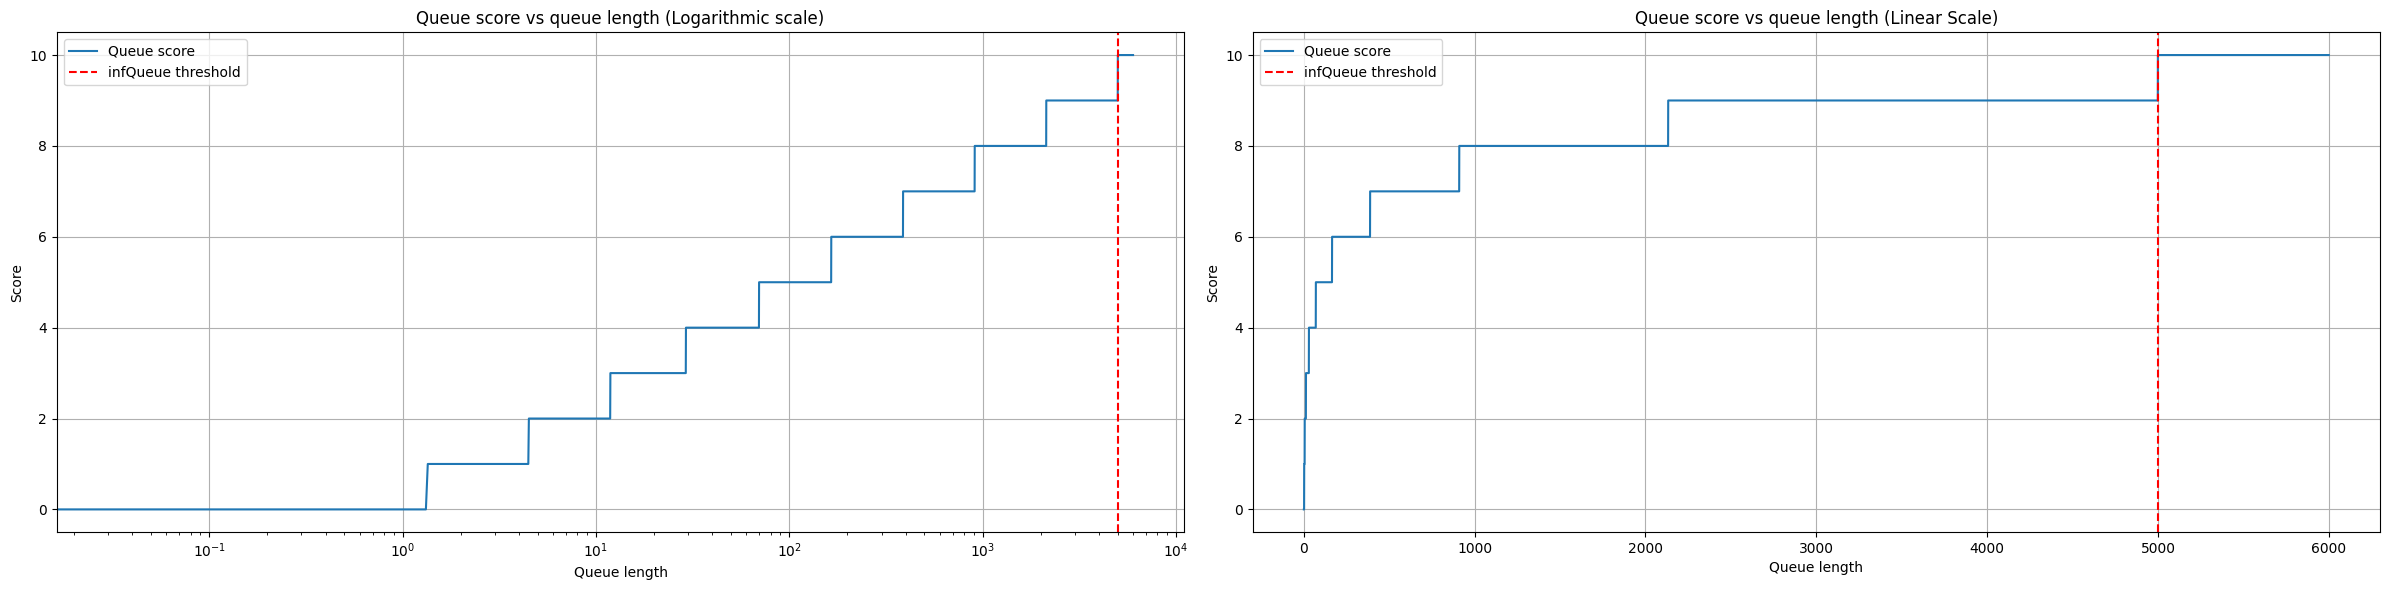

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the DeepSat score
def getDeepSatScore(queueLength, queueVals, infQueue):
    return queueVals if queueLength > infQueue else int(np.floor(queueVals * np.log10(queueLength + 1) / np.log10(infQueue)))

def plot_deep_sat_score(queueVals, infQueue, max_queue_length=6000, log_scale=True, linear_scale=True):
    """
    Plots the DeepSat score against queue length in both logarithmic and linear scales.

    Parameters:
    queueVals (int): The value of queueVals in the getDeepSatScore function.
    infQueue (int): The value of infQueue in the getDeepSatScore function.
    max_queue_length (int, optional): The maximum queue length to consider. Default is 5500.
    log_scale (bool, optional): Whether to include the logarithmic scale plot. Default is True.
    linear_scale (bool, optional): Whether to include the linear scale plot. Default is True.
    """

    # Generating a fine range of queue lengths for detailed plotting
    fine_queueLengths = np.linspace(0, max_queue_length, 1000000)

    # Calculating scores for each queue length
    fine_scores = [getDeepSatScore(q, queueVals, infQueue) for q in fine_queueLengths]

    # Plotting
    if log_scale:
        plt.figure(figsize=(12, 6))
        plt.semilogx(fine_queueLengths, fine_scores, label='DeepSat Score (Log Scale)')
        plt.xlabel('Queue Length (logarithmic scale)')
        plt.ylabel('Score')
        plt.title('DeepSat Score vs Queue Length (Logarithmic Scale)')
        plt.axvline(x=infQueue, color='r', linestyle='--', label='infQueue Threshold')
        plt.legend()
        plt.grid(True)
        plt.show()

    if linear_scale:
        plt.figure(figsize=(12, 6))
        plt.plot(fine_queueLengths, fine_scores, label='DeepSat Score (Linear Scale)')
        plt.xlabel('Queue Length (linear scale)')
        plt.ylabel('Score')
        plt.title('DeepSat Score vs Queue Length (Linear Scale)')
        plt.axvline(x=infQueue, color='r', linestyle='--', label='infQueue Threshold')
        plt.legend()
        plt.grid(True)
        plt.show()

def plot_deep_sat_score_combined(queueVals, infQueue, max_queue_length=6000, log_scale=True, linear_scale=True):
    """
    Plots the DeepSat score against queue length in both logarithmic and linear scales on a combined plot.

    Parameters:
    queueVals (int): The value of queueVals in the getDeepSatScore function.
    infQueue (int): The value of infQueue in the getDeepSatScore function.
    max_queue_length (int, optional): The maximum queue length to consider. Default is 5500.
    log_scale (bool, optional): Whether to include the logarithmic scale plot. Default is True.
    linear_scale (bool, optional): Whether to include the linear scale plot. Default is True.
    """

    # Generating a fine range of queue lengths for detailed plotting
    fine_queueLengths = np.linspace(0, max_queue_length, 200000)

    # Calculating scores for each queue length
    fine_scores = [getDeepSatScore(q, queueVals, infQueue) for q in fine_queueLengths]

    # Preparing the subplot
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

    # Plotting logarithmic scale if enabled
    if log_scale:
        axs[0].semilogx(fine_queueLengths, fine_scores, label='Queue score')
        axs[0].set_xlabel('Queue length')
        axs[0].set_ylabel('Score')
        axs[0].set_title('Queue score vs queue length (Logarithmic scale)')
        axs[0].axvline(x=infQueue, color='r', linestyle='--', label='infQueue threshold')
        axs[0].legend()
        axs[0].grid(True)

    # Plotting linear scale if enabled
    if linear_scale:
        axs[1].plot(fine_queueLengths, fine_scores, label='Queue score')
        axs[1].set_xlabel('Queue length')
        axs[1].set_ylabel('Score')
        axs[1].set_title('Queue score vs queue length (Linear Scale)')
        axs[1].axvline(x=infQueue, color='r', linestyle='--', label='infQueue threshold')
        axs[1].legend()
        axs[1].grid(True)

    # Display the combined plot
    plt.tight_layout()
    plt.show()

# Constants
queueVals = 10
infQueue = 5000

plot_deep_sat_score_combined(queueVals=queueVals, infQueue=infQueue)

# plot_deep_sat_score(queueVals=queueVals, infQueue=infQueue)

plt.show()


# Geographical coordinates